In [1]:
import os, shutil
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
# Kaggle에서 받은 CatsVSDogs 원본샘플들
# 고양이 12500장, 강아지 12500장, 총 25000장
original_dataset_dir = './train'

# 데이터를 넣을 폴더생성
base_dir = './data/cats_and_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [3]:
# 훈련용 테스트용 분리
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
# 훈련용 폴더에 cats와 dogs를 분리할 폴더 생성
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

In [5]:
# 테스트용 폴더에 cats와 dogs를 분리할 폴더 생성
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [6]:
# 10000개의 고양이 파일 훈련용 폴더에 돌리기
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    # 원본 고양이 파일 10000개를 훈련용 고양이 폴더에 복사
    shutil.copyfile(src, dst)

In [7]:
# 나머지 2500개의 고양이 파일 테스트용 폴더에 돌리기
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    # 원본 고양이 파일 2500개를 테스트 고양이 폴더에 복사
    shutil.copyfile(src, dst)

In [8]:
# 10000개의 강아지 파일 훈련용 폴더에 돌리기
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    # 원본 강아지 파일 10000개를 훈련용 고양이 폴더에 복사
    shutil.copyfile(src, dst)

In [9]:
# 나머지 2500개의 강아지 파일 테스트용 폴더에 돌리기
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    # 원본 강아지 파일 2500개를 테스트 강아지 폴더에 복사
    shutil.copyfile(src, dst)

In [10]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 10000
훈련용 강아지 이미지 전체 개수: 10000
테스트용 고양이 이미지 전체 개수: 2500
테스트용 강아지 이미지 전체 개수: 2500


In [11]:
from tensorflow.keras import models, layers

In [12]:
model = models.Sequential()

# 첫번째 input_shape은 사진마다 해상도 다 다르기 때문에 임의로 (150, 150)으로 잡는다.

# 새로운 parameter 생성 ==> (입력수 1 x kernel(가중치)(3x3) x 3(RGB컬러) x 출력수 32) + bias32 = 896
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(150, 150, 3),activation='relu'))

# 2x2의 범위에서 가장 큰 값만 나타내줌... 148*148에서 74*74로 줄어들음 # 모자이크가 사용 예
# 새로운 parameter 생성x
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 새로운 parameter 생성 ==> (입력수 32 x kernel(가중치)(3x3) x 1(RGB가 합쳐져서 1장으로 나옴) x 출력수 64) + bias64 = 18496
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2x2의 범위에서 가장 큰 값만 나타내줌... 74*74에서 36*36로 줄어들음 # 모자이크가 사용 예
# 새로운 parameter 생성x
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 새로운 parameter 생성 ==> (입력수 64 x kernel(가중치)(3x3) x 1(RGB가 합쳐져서 1장으로 나옴) x 출력수 128) + bias128 = 73856
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# 2x2의 범위에서 가장 큰 값만 나타내줌... 34*34에서 17*17로 줄어들음 # 모자이크가 사용 예
# 새로운 parameter 생성x
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 새로운 parameter 생성 ==> (입력수 128 x kernel(가중치)(3x3) x 1(RGB가 합쳐져서 1장으로 나옴) x 출력수 128) + bias128 = 147584
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# 2x2의 범위에서 가장 큰 값만 나타내줌... 15*15에서 7*7로 줄어들음 # 모자이크가 사용 예
# 새로운 parameter 생성x
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 1차원으로 데이터를 쫘악 펼침
# 새로운 parameter 생성x
# 입력수가 12(맨처음 150 -> conv2D 148 -> MaxPooling 74 -> fconv2D 72 -> MaxPooling 36
# -> conv2D 34 -> MaxPooling 17 -> conv2D 15 -> MaxPooling 7) x 7 x 128 로 바뀜 = 6272
model.add(layers.Flatten())

# 전체 네트워크의 50%를 임의로 끊어버려서 뒤쪽으로 가는 순전파 양을 줄게끔함 # 효율적으로 과대적합을 막아줌
# 새로운 parameter 생성x (존재는 하는데 계산만 안하는 것)
model.add(layers.Dropout(0.5))

# 새로운 parameter 생성 ==> (입력 수 6272 x 출력 수 512) + bias 512 = 3211776
model.add(layers.Dense(512, activation='relu'))

# 새로운 parameter 생성 ==> (입력 수 512 x 출력 수 1) + bias 1 = 513
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
# 모델의 실행 옵션을 설정 (손실함수) 2진분류니까 'binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 150x150을 어떻게 처리할것이냐
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터의 입력 feature 값을 0~1로 맞춰줌
train_datagen = ImageDataGenerator(rescale=1./255) # 1 나누기 255는 0이나오기 때문에 실수로 바꿔줘야함
test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory() 함수
# 따로 레이블작업을 해줄 필요가 없음
# target_size를 우리가 설정해준 만큼 알아서 잡아줌
# batch_size도 여기서 알아서 설정가능
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary' # 폴더가 cats dogs 두개니까 binary... 첫번째 cats를 0으로 dogs를 1로 알아서 잡아줌
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary' # 폴더가 cats dogs 두개니까 binary... 첫번째 cats를 0으로 dogs를 1로 알아서 잡아줌
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
1000/1000 [==============================] - 246s 245ms/step - loss: 0.6705 - accuracy: 0.5720 - val_loss: 0.6196 - val_accuracy: 0.6520
Epoch 2/30
1000/1000 [==============================] - 200s 200ms/step - loss: 0.5655 - accuracy: 0.7041 - val_loss: 0.4814 - val_accuracy: 0.7676
Epoch 3/30
1000/1000 [==============================] - 200s 200ms/step - loss: 0.4701 - accuracy: 0.7747 - val_loss: 0.4220 - val_accuracy: 0.8164
Epoch 4/30
1000/1000 [==============================] - 205s 205ms/step - loss: 0.4082 - accuracy: 0.8152 - val_loss: 0.3692 - val_accuracy: 0.8358
Epoch 5/30
1000/1000 [==============================] - 207s 207ms/step - loss: 0.3602 - accuracy: 0.8420 - val_loss: 0.3253 - val_accuracy: 0.8540
Epoch 6/30
1000/1000 [==============================] - 198s 198ms/step - loss: 0.3060 - accuracy: 0.8672 - val_loss: 0.3345 - val_accuracy: 0.8564
Epoch 7/30
1000/1000 [==============================] - 198s 197ms/step - loss: 0.2760 - accuracy: 0.8810 - val_

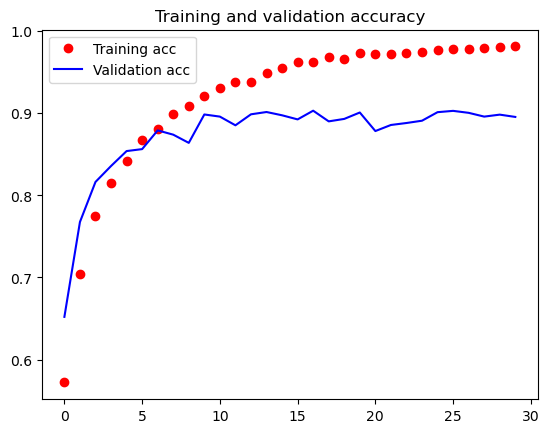

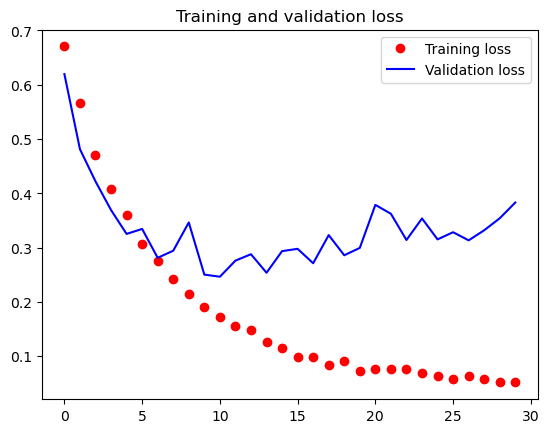

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()